# Histogram Chart Examples

This notebook contains examples of how to use the datachart package to create histogram charts.
The examples sequentially build on each other, going from simple to complex.

The histogram charts are created using the `hist_chart` function found in the `charts` package. Let's import it:

In [1]:
import random
from charts import hist_chart

The `hist_chart` function is that accepts a `dict` object containing the chart attributes, as shown in the following examples.

# Basic histogram chart

To create a basic histogram chart simply pass `dict` object containing only the `charts` attribute. The `charts` attribute value is either a `dict` or a `List[dict]` where each dictionary contains some of the following attributes:

```json
{
  "data": [{                                         # A list of histogram data points
    "y":     Union[int, float],                      # The x-axis value
  }],
  "style": {                                         # The style of the histogram (optional)
    "plot.hist.color":      Union[str, None],        # The color of the histogram
    "plot.hist.alpha":      Union[float, None],      # The transparency of the histogram
    "plot.hist.zorder":     Union[int, float, None], # The z-order of the histogram
    "plot.hist.fill":       Union[str, None],        # The fill color of the histogram
    "plot.hist.hatch":      Union[Hatch, None],      # The hatch pattern
    "plot.hist.type":       Union[str, None],        # The type of the histogram
    "plot.hist.align":      Union[str, None],        # The alignment of the histogram
    "plot.hist.edge.width": Union[int, float, None], # The width of the histogram edge
    "plot.hist.edge.color": Union[str, None],        # The color of the histogram edge
  },
  "subtitle": Optional[str],                         # The title of the chart
  "xlabel":   Optional[str],                         # The x-axis label
  "ylabel":   Optional[str],                         # The y-axis label
}
```

## Draw only the histogram chart

The following example shows how only the `charts["data"]` attribute is required to draw the histogram chart.

In [2]:
NUM_OF_POINTS = 100

In [3]:
charts = {
    "data": {"x": [100 * idx * random.random() for idx in range(NUM_OF_POINTS)]}
}

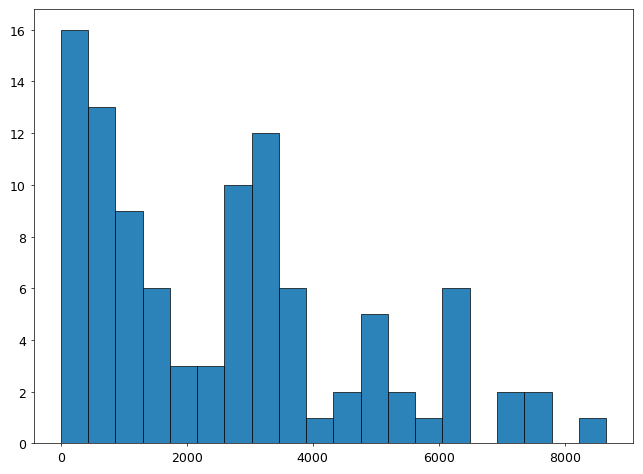

In [4]:
hist_chart(
    {
        "charts": charts,
    }
)

## Add the title and the x and y labels

Adding the `title`, `xlabel` and `ylabel` attributes is straightforward.

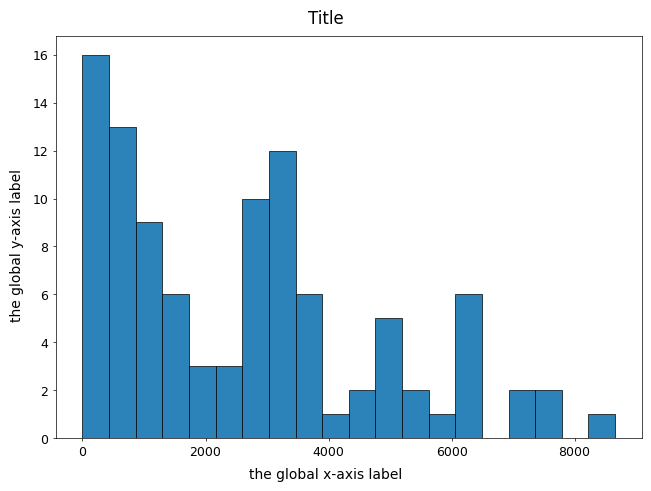

In [5]:
hist_chart(
    {
        "charts": charts,
        "title": "Title",
        "xlabel": "the global x-axis label",
        "ylabel": "the global y-axis label",
    }
)

## Number of bins

To change the number of bins, simply add the `num_bins` attribute. The number of bins is an integer.

## Changing the figure size and adding the grid

To change the figure size, simply add the `figsize` attribute. The `figsize` attribute can be a tuple (width, height), values are in inches. There are some predefined `Figsize` constants in the `constants` package, to make it easier to use.

To add the grid, simply add the `show_grid` attribute. Possible options are:
- `"both"`: shows both the x-axis and the y-axis gridlines
- `"x"`: shows only the x-axis grid lines
- `"y"`: shows only the y-axis grid lines

In [6]:
from schema.constants import Figsize

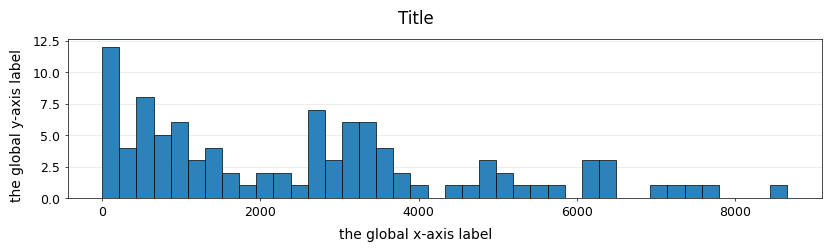

In [7]:
hist_chart(
    {
        "charts": charts,
        "title": "Title",
        "xlabel": "the global x-axis label",
        "ylabel": "the global y-axis label",
        "figsize": Figsize.A4_1_ROWS,  # must be a tuple (width, height), values are in inches
        "show_grid": "y",  # options: "both", "x", "y"
        "num_bins": 40,    # change the number of bins
    }
)

## Changing the histogram style

To change a single histogram style simply add the `style` attribute with the corresponding attributes. The style attributes are:
- `plot.hist.color`: The color of the histogram
- `plot.hist.alpha`: The transparency of the histogram
- `plot.hist.zorder`: The z-order of the histogram
- `plot.hist.fill`: The fill color of the histogram
- `plot.hist.hatch`: The hatch pattern
- `plot.hist.type`: The type of the histogram
- `plot.hist.align`: The alignment of the histogram
- `plot.hist.edge.width`: The width of the histogram edge
- `plot.hist.edge.color`: The color of the histogram edge

Again, to help with the style settings, some constants are defined in the `constants` package, such as:
- `Hatch`: The hatch style of the bar
- `HistType`: The type of the histogram

In [8]:
from schema.constants import HistType, Hatch

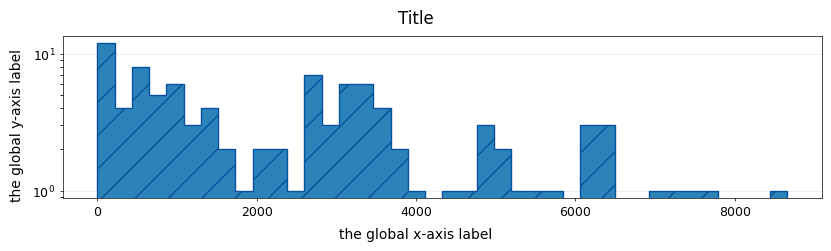

In [9]:
hist_chart(
    {
        "charts": {
            "data": charts["data"],
            "style": {  # define the style of the bars
                "plot.hist.hatch": Hatch.DIAGONAL,
                "plot.hist.fill": True,
                "plot.hist.edge.width": 1,
                "plot.hist.edge.color": "#08519c",
                "plot.hist.type": HistType.STEP,
            },
        },
        "title": "Title",
        "xlabel": "the global x-axis label",
        "ylabel": "the global y-axis label",
        "figsize": Figsize.A4_1_ROWS,  
        "show_grid": "y",  
        "num_bins": 40,
        "log_scale": True, # use log scale
    }
)

## Changing the orientation

To change the orientation of the histogram, simply add the `orientation` attribute. Possible options are:
- `"horizontal"`: the histogram are horizontal
- `"vertical"`: the histogram are vertical

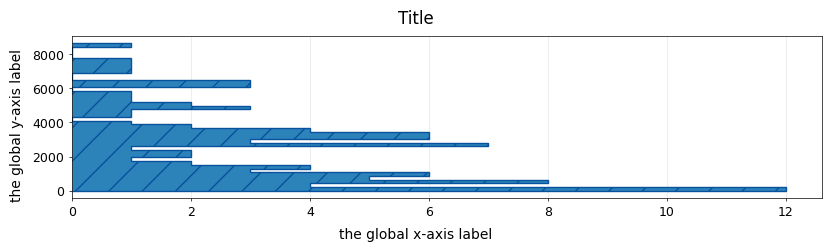

In [10]:
hist_chart(
    {
        "charts": {
            "data": charts["data"],
            "style": {  # define the style of the bars
                "plot.hist.hatch": Hatch.DIAGONAL,
                "plot.hist.fill": True,
                "plot.hist.edge.width": 1,
                "plot.hist.edge.color": "#08519c",
                "plot.hist.type": HistType.STEP,
            },
        },
        "title": "Title",
        "xlabel": "the global x-axis label",
        "ylabel": "the global y-axis label",
        "figsize": Figsize.A4_1_ROWS,  
        "show_grid": "x",  # change the grid to match the change in orientation
        "num_bins": 40,
        "orientation": "horizontal", # options: # "horizontal", "vertical"
    }
)

# Multiple histogram charts

To add multiple histogram charts, simply add the `charts` attribute with a list of charts, as shown below.

In [11]:
charts = [
    {
        "data": {"x": [100 * idx * random.random() for idx in range(NUM_OF_POINTS)]},
        "style": {
            "plot.bar.error.color": "#000000",
        },
        "subtitle": f"Histogram {id}",
    }
    for id in range(2)
]

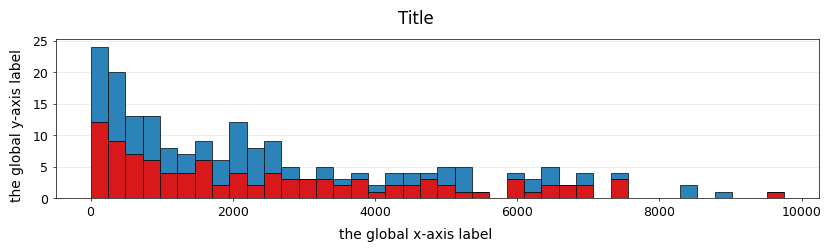

In [12]:
hist_chart(
    {
        "charts": charts,
        "title": "Title",
        "xlabel": "the global x-axis label",
        "ylabel": "the global y-axis label",
        "figsize": Figsize.A4_1_ROWS,  # must be a tuple (width, height), values are in inches
        "show_grid": "y",  # options: "both", "x", "y"
        "num_bins": 40,
    }
)

## Add a subtitle to each chart

To add a subtitle to each histogram, simply add the `subtitle` attribute to each required chart. In addition, to help with discerning which chart is which, use the `show_legend` attribute to show the legend of the charts.

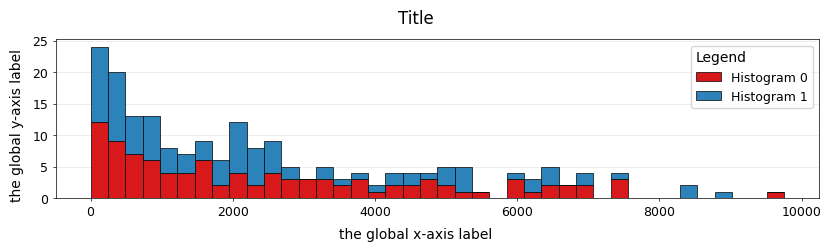

In [13]:
hist_chart(
    {
        "charts": charts,
        "title": "Title",
        "xlabel": "the global x-axis label",
        "ylabel": "the global y-axis label",
        "figsize": Figsize.A4_1_ROWS,  # must be a tuple (width, height), values are in inches
        "show_grid": "y",  # options: "both", "x", "y",
        "num_bins": 40,
        "show_legend": True,  # show the legend
        
    }
)

## Show each chart in its own subplot

To draw multiple charts in each subplot, simply add the `subplots` attribute. The chart `subtitles` are then added at the top of each subplot, while the `title`, `xlabel` and `ylabel` are positioned to be common to all charts.

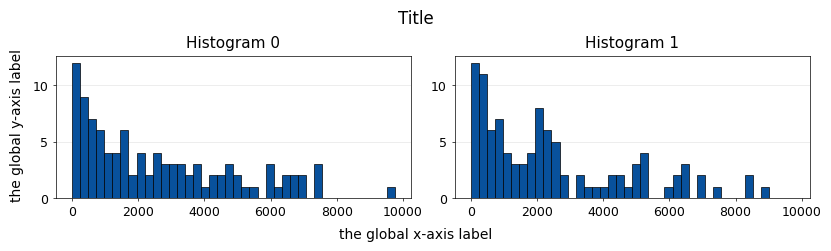

In [14]:
hist_chart(
    {
        "charts": charts,
        "title": "Title",
        "xlabel": "the global x-axis label",
        "ylabel": "the global y-axis label",
        "figsize": Figsize.A4_1_ROWS,
        "subplots": True,  # show charts as subplots
        "num_bins": 40,
        "show_grid": "y",
        # "show_legend": True, # show_legend is not supported
    }
)

## Sharing the x-axis and/or y-axis across subplots

To share the x-axis and/or y-axis across subplots, simply add the `sharex` and/or `sharey` attributes.

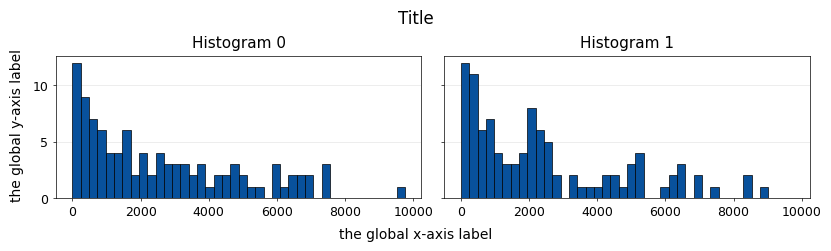

In [15]:
hist_chart(
    {
        "charts": charts,
        "title": "Title",
        "xlabel": "the global x-axis label",
        "ylabel": "the global y-axis label",
        "figsize": Figsize.A4_1_ROWS,
        "subplots": True, 
        "sharex": True, # share the x-axis across subplots
        "sharey": True, # share the y-axis across subplots
        "show_grid": "y",
        "num_bins": 40,
    }
)

## Changing the orientation for all subplots

The `orientation` attribute can be used to change the orientation of all subplots.

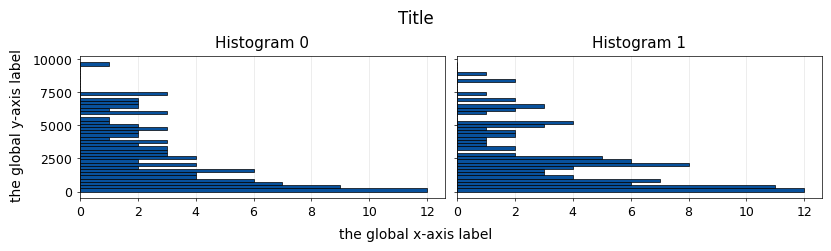

In [16]:
hist_chart(
    {
        "charts": charts,
        "title": "Title",
        "xlabel": "the global x-axis label",
        "ylabel": "the global y-axis label",
        "figsize": Figsize.A4_1_ROWS,
        "subplots": True, 
        "sharex": True, # share the x-axis across subplots
        "sharey": True, # share the y-axis across subplots
        "show_grid": "x",
        "num_bins": 40,
        "orientation": "horizontal",
    }
)

## Show the histogram as a density distribution

To show the density distribution, simply add the `show_density` attribute.

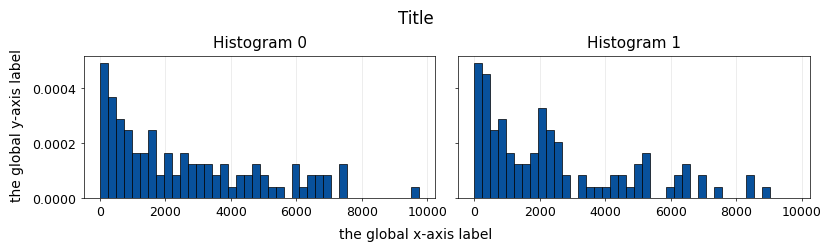

In [17]:
hist_chart(
    {
        "charts": charts,
        "title": "Title",
        "xlabel": "the global x-axis label",
        "ylabel": "the global y-axis label",
        "figsize": Figsize.A4_1_ROWS,
        "subplots": True, 
        "sharex": True, # share the x-axis across subplots
        "sharey": True, # share the y-axis across subplots
        "show_grid": "x",
        "num_bins": 40,
        "show_density": True, # shows the density of the data
    }
)

## Show the cumulative distribution

To show the cumulative distribution, simply add the `show_cumulative` attribute.

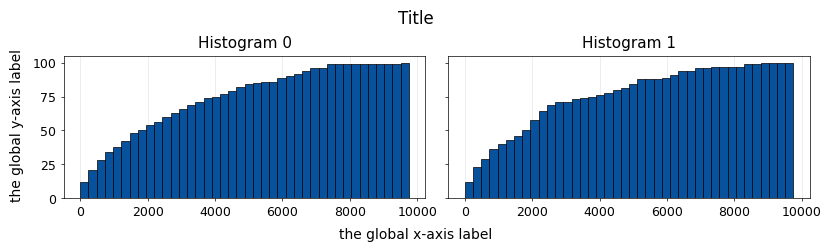

In [18]:
hist_chart(
    {
        "charts": charts,
        "title": "Title",
        "xlabel": "the global x-axis label",
        "ylabel": "the global y-axis label",
        "figsize": Figsize.A4_1_ROWS,
        "subplots": True, 
        "sharex": True, # share the x-axis across subplots
        "sharey": True, # share the y-axis across subplots
        "show_grid": "x",
        "num_bins": 40,
        "show_cumulative": True, # shows the cumulative distribution
    }
)

## Show the cumulative distribution as a density distribution

To show the cumulative distribution as a density distribution, simply add both the `show_density` and `show_cumulative` attribute.

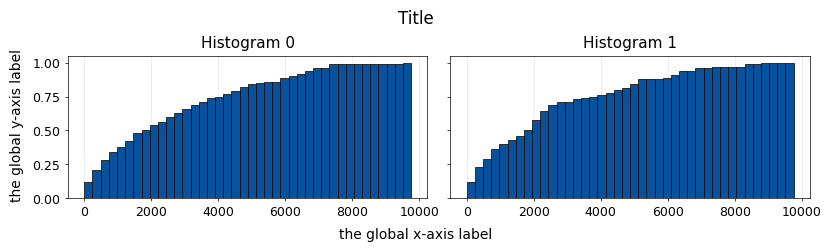

In [19]:
hist_chart(
    {
        "charts": charts,
        "title": "Title",
        "xlabel": "the global x-axis label",
        "ylabel": "the global y-axis label",
        "figsize": Figsize.A4_1_ROWS,
        "subplots": True, 
        "sharex": True, # share the x-axis across subplots
        "sharey": True, # share the y-axis across subplots
        "show_grid": "x",
        "num_bins": 40,
        "show_density": True, # shows the density of the data
        "show_cumulative": True, # shows the cumulative distribution
    }
)

One can also change the orientation when showing the cumulative distribution.

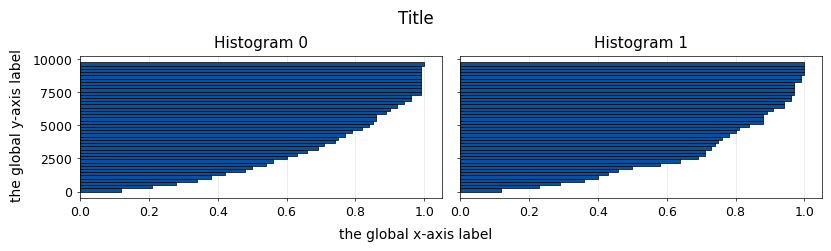

In [20]:
hist_chart(
    {
        "charts": charts,
        "title": "Title",
        "xlabel": "the global x-axis label",
        "ylabel": "the global y-axis label",
        "figsize": Figsize.A4_1_ROWS,
        "subplots": True, 
        "sharex": True, # share the x-axis across subplots
        "sharey": True, # share the y-axis across subplots
        "show_grid": "x",
        "num_bins": 40,
        "show_density": True, # shows the density of the data
        "show_cumulative": True, # shows the cumulative distribution
        "orientation": "horizontal",
    }
)

## Log scale the y-axis

To use the log scale for the y-axis, simply add the `log_scale` attribute.

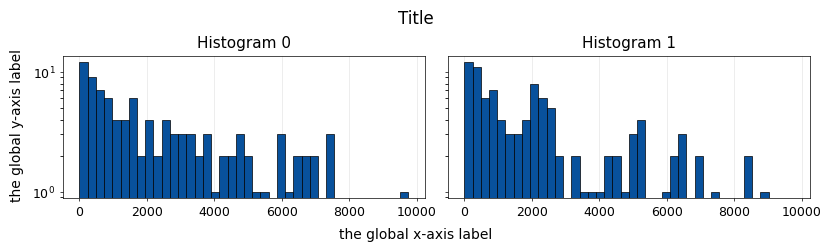

In [21]:
hist_chart(
    {
        "charts": charts,
        "title": "Title",
        "xlabel": "the global x-axis label",
        "ylabel": "the global y-axis label",
        "figsize": Figsize.A4_1_ROWS,
        "subplots": True, 
        "sharex": True, # share the x-axis across subplots
        "sharey": True, # share the y-axis across subplots
        "show_grid": "x",
        "num_bins": 40,
        "log_scale": True
    }
)